# EP2420 - Project 1

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1, l2
from keras.optimizers import SGD
from keras.optimizers.legacy import Adam
from keras import callbacks


from scikeras.wrappers import KerasRegressor
import keras_tuner
from keras_tuner.tuners import RandomSearch, BayesianOptimization, Hyperband

### Data import and first analysis

In [25]:
X = pd.read_csv("data/X.csv")
Y = pd.read_csv("data/Y.csv")
X.head()

,TimeStamp,runq-sz,%%memused,proc/s,cswch/s,all_%%usr,ldavg-1,totsck,pgfree/s,plist-sz,file-nr,idel/s,tps
0,1409585052,91,17.30,0.0,75865.0,97.96,122.77,557,80335.0,1019,2976,24.0,11.0
1,1409585053,86,17.31,0.0,74651.0,98.29,122.77,556,74681.0,1019,2976,23.0,0.0
2,1409585054,89,17.32,0.0,78790.0,98.00,122.77,556,78166.0,1019,2976,23.0,0.0
3,1409585055,88,17.33,0.0,75077.0,97.75,122.77,555,74256.0,1019,2976,21.0,0.0
4,1409585056,96,17.32,10.0,72717.0,97.79,122.77,553,84232.0,1011,2976,67.0,2.0


In [26]:
Y = Y.drop("TimeStamp", axis=1)
Y.head()

,DispFrames
0,13.00
1,13.00
2,13.82
3,16.23
4,15.95


Let's mix the features and output datafiles together !

In [27]:
df = X
df["Y"] = Y
df.head()

,TimeStamp,runq-sz,%%memused,proc/s,cswch/s,all_%%usr,ldavg-1,totsck,pgfree/s,plist-sz,file-nr,idel/s,tps,Y
0,1409585052,91,17.30,0.0,75865.0,97.96,122.77,557,80335.0,1019,2976,24.0,11.0,13.00
1,1409585053,86,17.31,0.0,74651.0,98.29,122.77,556,74681.0,1019,2976,23.0,0.0,13.00
2,1409585054,89,17.32,0.0,78790.0,98.00,122.77,556,78166.0,1019,2976,23.0,0.0,13.82
3,1409585055,88,17.33,0.0,75077.0,97.75,122.77,555,74256.0,1019,2976,21.0,0.0,16.23
4,1409585056,96,17.32,10.0,72717.0,97.79,122.77,553,84232.0,1011,2976,67.0,2.0,15.95


## Task 5 - Estimating Service Metrics from Device Statistics using Neural Network Regression

In [28]:
# Creation of the different matrix. The feature matrix X and the service metrics matrix Y.
t = df['TimeStamp']
X = df.drop(labels = ['Y','TimeStamp'],axis = 1)
Y = df['Y']

# Train / Validation / Test sets split
X_train, X_temp, Y_train, Y_temp, t_train, t_temp = train_test_split(X, Y, t, test_size=0.25, random_state=42)
X_val, X_test, Y_val, Y_test, t_val, t_test = train_test_split(X_temp, Y_temp, t_temp, test_size=0.5, random_state=42)

# Standardize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [29]:
# Build the first neural network model
first_model = Sequential()

first_model.add(tf.keras.Input(shape=X_train.shape[1])) # Input layer

first_model.add(Dense(20, activation='relu',kernel_regularizer=l1(1e-5))) 
first_model.add(Dense(10, activation='relu',kernel_regularizer=l1(1e-5)))
first_model.add(Dense(5, activation='relu',kernel_regularizer=l1(1e-5)))

first_model.add(Dense(1, activation='linear')) # Output layer

first_model.compile(optimizer=SGD(0.01), loss='mean_absolute_error', metrics=['mae'])

# Train the model
first_model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_val, Y_val))
test_loss, test_nmae = first_model.evaluate(X_test, Y_test, verbose=0)
test_nmae /=np.mean(Y_test)

print(f"Test Loss: {test_loss}")
print(f'Test NMAE: {test_nmae}')

Epoch 1/30
85/85 [==============================] - 0s 1ms/step - loss: 15.4969 - mae: 15.4957 - val_loss: 3.9263 - val_mae: 3.9251
Epoch 2/30
85/85 [==============================] - 0s 545us/step - loss: 2.4935 - mae: 2.4923 - val_loss: 2.2070 - val_mae: 2.2058
Epoch 3/30
85/85 [==============================] - 0s 535us/step - loss: 1.9858 - mae: 1.9846 - val_loss: 1.8299 - val_mae: 1.8287
Epoch 4/30
85/85 [==============================] - 0s 562us/step - loss: 1.9506 - mae: 1.9494 - val_loss: 1.8539 - val_mae: 1.8528
Epoch 5/30
85/85 [==============================] - 0s 581us/step - loss: 1.8943 - mae: 1.8931 - val_loss: 1.9000 - val_mae: 1.8988
Epoch 6/30
85/85 [==============================] - 0s 588us/step - loss: 1.9068 - mae: 1.9057 - val_loss: 2.7225 - val_mae: 2.7213
Epoch 7/30
85/85 [==============================] - 0s 581us/step - loss: 1.9366 - mae: 1.9354 - val_loss: 3.4349 - val_mae: 3.4338
Epoch 8/30
85/85 [==============================] - 0s 639us/step - loss: 1.

NMAE on the Naive Model = 22.14158979310507 %
 
NMAE on the Linear Model = 8.912756193125018 %
 
15/15 [==============================] - 0s 443us/step


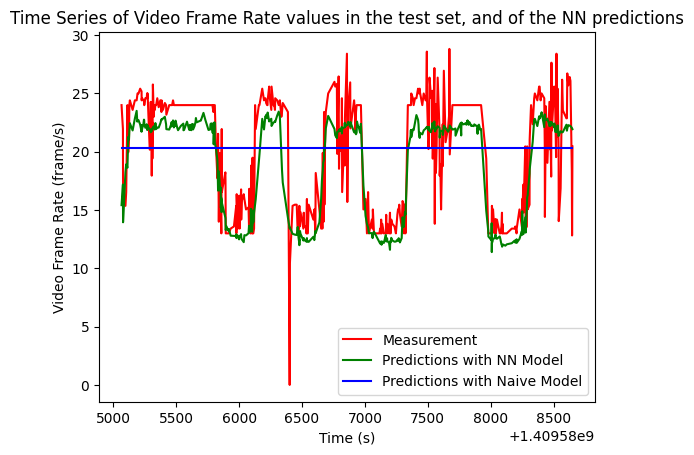

In [44]:
# Time series plot of the predictions
predictions_naive = np.mean(Y_train)
NMAE_naive = np.mean(np.abs(Y_test - predictions_naive))/np.mean(Y_test)
print("NMAE on the Naive Model = {} %\n ".format(NMAE_naive*100))

linear_model = LinearRegression()
linear_model.fit(X_train,Y_train)
predictions_linear = linear_model.predict(X_test)
NMAE_linear = np.mean(np.abs(Y_test - predictions_linear))/np.mean(Y_test)
print("NMAE on the Linear Model = {} %\n ".format(NMAE_linear*100))

predictions_first_model = first_model.predict(X_test)
t_test_array = np.array(t_test)
Y_test_array = np.array(Y_test)

sorted_idx = np.argsort(t_test_array)
sorted_t_test = np.sort(t_test_array)
sorted_Y_test = Y_test_array[sorted_idx]
sorted_predictions = predictions_first_model[sorted_idx]
sorted_predictions_naive = np.ones(len(Y_test)) * predictions_naive

fig,ax = plt.subplots()

ax.plot(sorted_t_test, sorted_Y_test,label = 'Measurement', color ='r')
ax.plot(sorted_t_test, sorted_predictions,label = 'Predictions with NN Model', color = 'g')
ax.plot(sorted_t_test, sorted_predictions_naive,label = 'Predictions with Naive Model', color = 'b')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Video Frame Rate (frame/s)')
ax.set_title('Time Series of Video Frame Rate values in the test set, and of the NN predictions')
ax.legend()

# Show the plot
plt.show()

In [31]:
# Definition of a function to create the Neural Network Model
def build_model(hp):
    model = Sequential()
    
    # Number of hidden layers
    num_hidden_layers = hp.Int('num_hidden_layers', min_value=1, max_value=5, step=1)
    
    for i in range(num_hidden_layers):
        # Number of nodes in each hidden layer
        units = hp.Int(f'units_{i}', min_value=4, max_value=96, step=4)
        
        # Type of norm (l1 or l2) and the value of lambda
        norm_type = hp.Choice(f'norm_type_{i}', values=['l1', 'l2'])
        norm_value = hp.Float(f'norm_value_{i}', min_value=1e-5, max_value=1e-1, sampling='log')
        
        if norm_type == 'l1':
            model.add(Dense(units, activation='relu', kernel_regularizer=l1(norm_value)))
        elif norm_type == 'l2':
            model.add(Dense(units, activation='relu', kernel_regularizer=l2(norm_value)))

    model.add(Dense(1, activation='linear'))

    # Learning rate for the optimizer
    lr = hp.Choice('learning_rate', values=[0.1, 0.01, 0.001], default=0.01)
    
    # Choose optimizer based on learning rate
    if lr < 0.01:
        optimizer = SGD(learning_rate=lr)
    else:
        optimizer = Adam(learning_rate=lr)
    
    model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mae'])

    return model


In [32]:
tuner1 = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials = 200,
    executions_per_trial=1
)

# Perform the hyperparameter search
tuner1.search(X_train, Y_train,validation_data=(X_val, Y_val))

# Get the best hyperparameters
best_hps_1 = tuner1.get_best_hyperparameters(1)[0]

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_hps_1.values}")

model1= tuner1.hypermodel.build(best_hps_1)

earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=5,restore_best_weights=True)

model1.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_val, Y_val), verbose=0, callbacks = [earlystopping])

test_loss, test_nmae = model1.evaluate(X_test, Y_test, verbose=0)
test_nmae /=np.mean(Y_test)

print(f"Test Loss: {test_loss}")
print(f"Test NMAE: {test_nmae}")

Trial 200 Complete [00h 00m 01s]
val_loss: 16.660429000854492

Best val_loss So Far: 1.3581814765930176
Total elapsed time: 13h 32m 46s
Best Hyperparameters: {'num_hidden_layers': 3, 'units_0': 48, 'norm_type_0': 'l2', 'norm_value_0': 0.0001913124574126905, 'learning_rate': 0.01, 'units_1': 64, 'norm_type_1': 'l2', 'norm_value_1': 0.00011510003679609099, 'units_2': 128, 'norm_type_2': 'l2', 'norm_value_2': 2.0771195655986348e-05, 'units_3': 32, 'norm_type_3': 'l2', 'norm_value_3': 1.1956458237116755e-05, 'units_4': 32, 'norm_type_4': 'l2', 'norm_value_4': 0.0001827197934167961, 'tuner/epochs': 40, 'tuner/initial_epoch': 20, 'tuner/bracket': 5, 'tuner/round': 5, 'tuner/trial_id': '0072'}
Test Loss: 1.6344212293624878
Test NMAE: 0.08063677779050817


In [33]:
tuner2 = BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=200,  # Number of hyperparameter combinations to try
    num_initial_points=20,  # Number of randomly selected hyperparameter combinations before optimization
    overwrite = True
)

# Perform the hyperparameter search
tuner2.search(X_train, Y_train, validation_data=(X_val, Y_val))

# Get the best hyperparameters
best_hps_2 = tuner2.get_best_hyperparameters(1)[0]

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_hps_2.values}")

model2 = tuner2.hypermodel.build(best_hps_2)
earlystopping = callbacks.EarlyStopping(monitor="val_mae", mode="min", patience=5,restore_best_weights=True)
model2.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_val, Y_val), verbose=0,callbacks=[earlystopping])

test_loss, test_nmae = model2.evaluate(X_test, Y_test, verbose=0)
test_nmae /=np.mean(Y_test)

print(f"Test Loss: {test_loss}")
print(f"Test NMAE: {test_nmae}")

Trial 200 Complete [00h 00m 00s]
val_loss: 1.9411184787750244

Best val_loss So Far: 1.751786470413208
Total elapsed time: 00h 06m 11s
Best Hyperparameters: {'num_hidden_layers': 1, 'units_0': 4, 'norm_type_0': 'l1', 'norm_value_0': 1e-05, 'learning_rate': 0.1, 'units_1': 40, 'norm_type_1': 'l2', 'norm_value_1': 0.0007747172238236908, 'units_2': 4, 'norm_type_2': 'l2', 'norm_value_2': 0.1, 'units_3': 52, 'norm_type_3': 'l1', 'norm_value_3': 0.00012591210864941563, 'units_4': 96, 'norm_type_4': 'l1', 'norm_value_4': 0.0007321890063573511}
Test Loss: 1.6443629264831543
Test NMAE: 0.08170152761088958


In [35]:
tuner3 = Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=40,  # Maximum number of epochs for each trial
    factor=2,  # Reduction factor for the number of configurations in each bracket
    overwrite = True
)

# Perform the hyperparameter search
tuner3.search(X_train, Y_train, validation_data=(X_val, Y_val))

# Get the best hyperparameters
best_hps_3 = tuner3.get_best_hyperparameters(1)[0]

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_hps_3.values}")

model3 = tuner3.hypermodel.build(best_hps_3)
#earlystopping = callbacks.EarlyStopping(monitor="val_mae", mode="min", patience=5,restore_best_weights=True)
model3.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_val, Y_val), verbose=0)

test_loss, test_nmae = model3.evaluate(X_test, Y_test, verbose=0)
test_nmae /=np.mean(Y_test)

print(f"Test Loss: {test_loss}")
print(f"Test NMAE: {test_nmae}")

Trial 186 Complete [00h 00m 03s]
val_loss: 1.3840532302856445

Best val_loss So Far: 1.3632874488830566
Total elapsed time: 00h 02m 29s
Best Hyperparameters: {'num_hidden_layers': 2, 'units_0': 12, 'norm_type_0': 'l1', 'norm_value_0': 0.00024124188784574818, 'learning_rate': 0.01, 'units_1': 68, 'norm_type_1': 'l2', 'norm_value_1': 8.074939740679232e-05, 'units_2': 28, 'norm_type_2': 'l2', 'norm_value_2': 3.3538431145135276e-05, 'units_3': 88, 'norm_type_3': 'l2', 'norm_value_3': 0.002130994534318297, 'units_4': 96, 'norm_type_4': 'l1', 'norm_value_4': 0.05118617865240983, 'tuner/epochs': 40, 'tuner/initial_epoch': 20, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0144'}
Test Loss: 1.5317686796188354
Test NMAE: 0.07561157356206887


15/15 [==============================] - 0s 429us/step


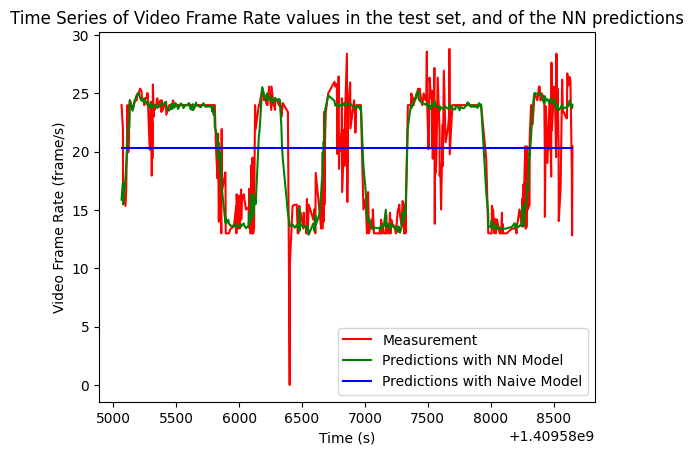

In [45]:
predictions_best_model = model3.predict(X_test)
t_test_array = np.array(t_test)
Y_test_array = np.array(Y_test)

predictions_naive = np.mean(Y_train)

sorted_idx = np.argsort(t_test_array)
sorted_t_test = np.sort(t_test_array)
sorted_Y_test = Y_test_array[sorted_idx]
sorted_predictions = predictions_best_model[sorted_idx]
sorted_predictions_naive = np.ones(len(Y_test)) * predictions_naive

fig,ax = plt.subplots()

ax.plot(sorted_t_test, sorted_Y_test,label = 'Measurement', color ='r')
ax.plot(sorted_t_test, sorted_predictions,label = 'Predictions with NN Model', color = 'g')
ax.plot(sorted_t_test, sorted_predictions_naive,label = 'Predictions with Naive Model', color = 'b')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Video Frame Rate (frame/s)')
ax.set_title('Time Series of Video Frame Rate values in the test set, and of the NN predictions')
ax.legend()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Density plot of Error on Video Frame Rate Estimation')

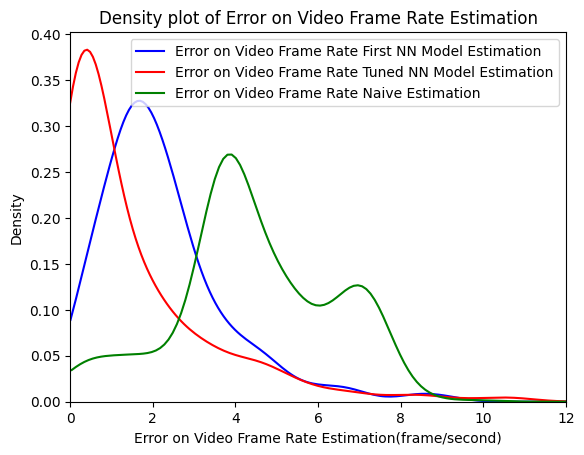

In [54]:
import seaborn as sns 

error_first_model = np.abs(Y_test - predictions_first_model.squeeze())
error_best_model = np.abs(Y_test - predictions_best_model.squeeze())
error_naive = np.abs(Y_test - predictions_naive)

plt.figure()

# Creation of the density plot
sns.kdeplot(data=error_first_model, label="Error on Video Frame Rate First NN Model Estimation",color ='b',cut = 0)
sns.kdeplot(data=error_best_model, label="Error on Video Frame Rate Tuned NN Model Estimation",color ='r',cut = 0)
sns.kdeplot(data=error_naive, label="Error on Video Frame Rate Naive Estimation",color ='g',cut = 0)

plt.xlabel('Error on Video Frame Rate Estimation(frame/second)')
plt.xlim((0,12))
plt.ylabel('Density')
plt.legend()
plt.title('Density plot of Error on Video Frame Rate Estimation')